# ПРИНЯТИЕ РЕШЕНИЙ В БИЗНЕСЕ

**Заказчик** -  крупный интернет-магазин. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

**Задача** - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Часть 1. Приоритизация гипотез.
В файле **hypothesis.csv** 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. Задачи:
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 2. Анализ A/B-теста
В ходе проведения A/B-теста были получены результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача - проанализировать A/B-тест, сделать выводы и предположения:
- Построить график кумулятивной выручки по группам.
- Построить график кумулятивного среднего чека по группам.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построить график кумулятивного среднего количества заказов на посетителя по группам.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
- Построить точечный график количества заказов по пользователям.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
- Принять решение по результатам теста и объяснить его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

# Загрузка данных.
У нас имеется 3 датасета: гипотезы, заказы, посетители. Откроем их, сохранив в одноимённые переменные, и изучим основную информацию:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
from scipy import stats as st

In [2]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


В датафрейме **hypothesis** (гипотезы) 9 записей и есть следующая информация:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. (Чем больше Efforts, тем дороже проверка).

In [5]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В датафрейме **orders** (заказы) 1197 записей и есть следующая информация:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [7]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датафрейме **visitors** (посетители) 62 записи и есть следующая информация:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Обратим внимание, что названия не всех колонок датафреймов в "змеином" регистре, а также, что колонки с датами в формате object, а не datetime64 (исправим). Пропущенных значений нет. Проверим все фреймы на наличие дубликатов:

In [9]:
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


Дубликатов нет. Приведём в порядок названия колонок и колонки с датами:

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
orders = orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})
print(hypothesis.columns)
print(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах. Дело в том, что при А/В тестировании могут быть ошибки при логировании и распределении пользователей по группам.

In [12]:
print(orders['visitor_id'].nunique())
print(orders[orders['group'] == 'A']['visitor_id'].nunique() +
      orders[orders['group'] == 'B']['visitor_id'].nunique())

1031
1089


In [13]:
orders[orders[['visitor_id', 'date']].duplicated(keep=False)]

,transaction_id,visitor_id,date,revenue,group
27,1630050528,237748145,2019-08-15,7620,B
41,2594268419,237748145,2019-08-15,1090,A
94,252633006,457167155,2019-08-22,5970,B
95,372616894,457167155,2019-08-22,987,B
96,1170105516,2706377257,2019-08-01,9024,A
...,...,...,...,...,...
1165,2289555915,3963646447,2019-08-14,7485,B
1171,2860596918,3803269165,2019-08-14,6613,B
1172,3898641900,3803269165,2019-08-14,790,B
1178,4052155355,2949041841,2019-08-14,190,A


С одной стороны, такая проверка выглядит логично (58 человек состоят в обеих группах) и есть даже покупатели, состоящие в разных группах в один день. Но на группы делятся не покупатели, а изначальные посетители. И никто нам не может гарантировать, что в обеих группах будет одинаковое количество заказов. Относительно общего количества посетителей разница достаточно мала, чтобы её можно было игнорировать. Видимо, наша система не запоминала пользователей, уже совершивших заказ и при возврате на сайт кидала их в случайную группу. В большинстве случаев статистические тесты (в частности stats.mannwhitneyu) не требуют равенства групп и в состоянии засечь разницу между разными группами в том числе.

## Приоритизация гипотез.

### Фреймворк ICE для приоритизации гипотез.
В **hypothesis** у нас список из 9-ти гипотез, каждый показатель которой оценен по шкале от 0 до 10.
Применим один из самых популярных методов приоритезации гипотез - ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия»).

In [14]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round(3)
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


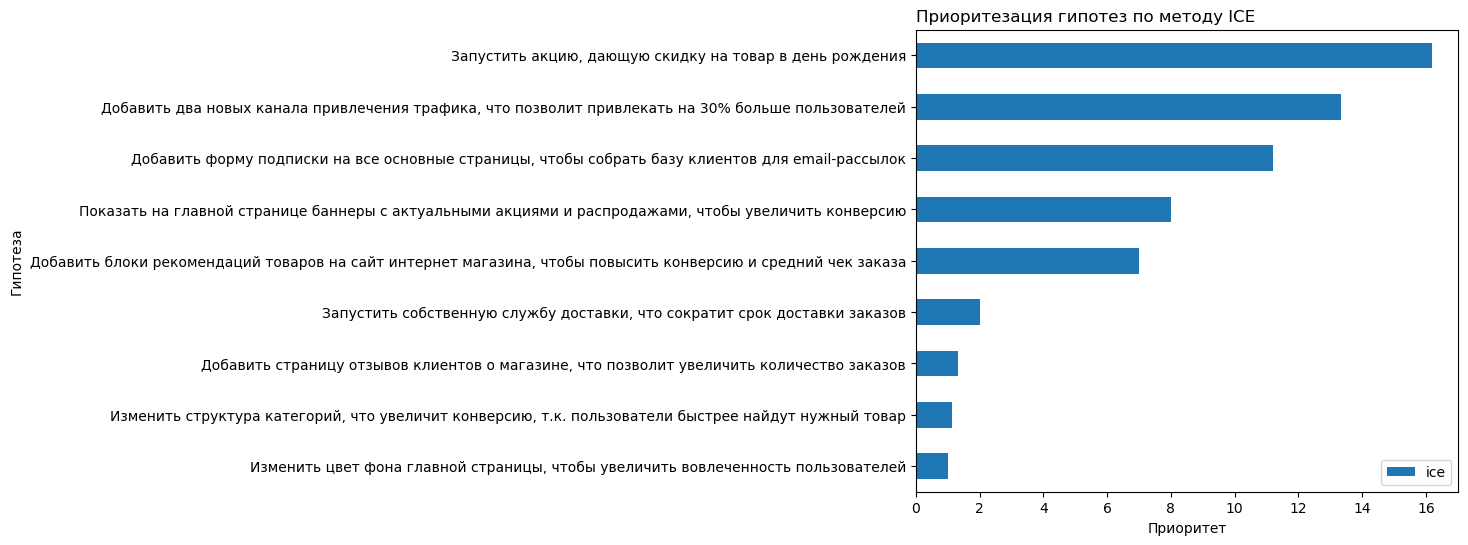

In [15]:
ax = (hypothesis[['hypothesis', 'ice']].set_index('hypothesis')
      .sort_values('ice', ascending=True).plot(kind='barh', figsize=(7, 6))
     )
ax.set_ylabel('Гипотеза')
ax.set_xlabel('Приоритет')
ax.set_title('Приоритезация гипотез по методу ICE', loc='left');

Из наших 9 гипотез хорошо выделяются 5, которые можно поставить в приоритет, но в фрейме также есть показатель **reach** - скольких пользователей затронет изменение, которое мы хотим внести (охват), поэтому проверим также и RICE.

### Фреймворк RICE для приоритизации гипотез.

In [16]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


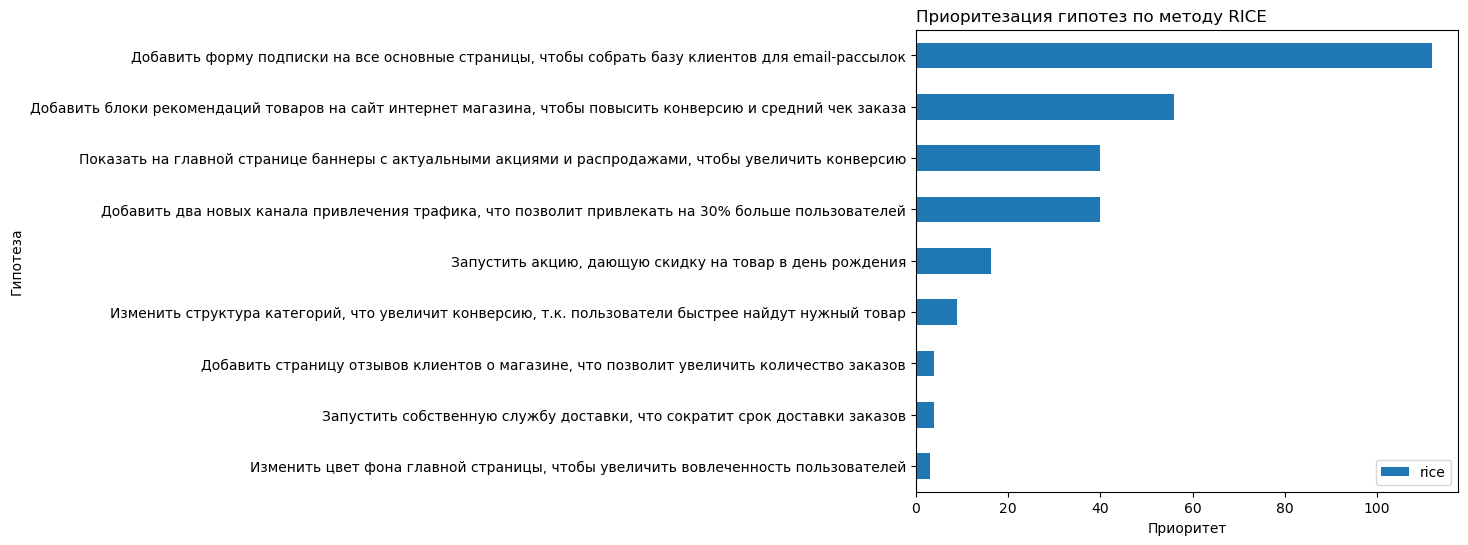

In [17]:
ax = (hypothesis[['hypothesis', 'rice']].set_index('hypothesis')
      .sort_values('rice', ascending=True).plot(kind='barh', figsize=(7, 6))
     )
ax.set_ylabel('Гипотеза')
ax.set_xlabel('Приоритет')
ax.set_title('Приоритезация гипотез по методу RICE', loc='left');

Топ-5 остался тем же, но изменился их порядок. Разница заключается в том, что одна учитывает кол-во пользователей, которых затронут изменения, а другая - нет. Вполне логично учитывать не только насколько сильно повлияют изменения на пользователей и насколько мы в этом уверены при оценённом уровне усилий, но и скольких пользователей изменение может затронуть. Самый яркий пример - номер 8 - по ICE он на 1 месте, а по RICE, наоборот, замыкает пятёрку. Для наглядности:

In [18]:
hypo = hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)
hypo

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200,16.2


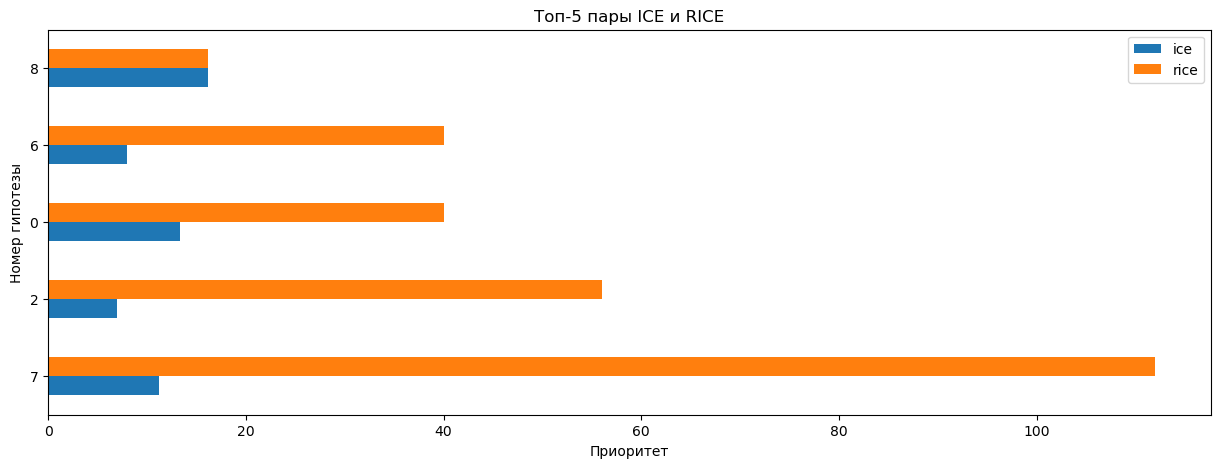

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
hypo.plot(kind='barh', ax=ax)
ax.legend()
ax.set_xlabel('Приоритет')
ax.set_ylabel('Номер гипотезы')
ax.set_title('Топ-5 пары ICE и RICE');

## Часть. Анализ A/B-теста.

### Построим график кумулятивной выручки по группам.

Чтобы построить графики по кумулятивным (накапливаемым) данным, необходимо собрать соответствующий агрегированный датафрейм, содержащий информацию о дате, группе (А или В), кумулятивных количестве заказов и пользователей их оформивших, среднем чеке и, наконец, о кумулятивном количестве посетителей магазина.

In [20]:
dates_grouped = orders[['date', 'group']].drop_duplicates()
orders_grouped = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_grouped.head(10)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996
499,2019-08-04,A,84,77,425699
498,2019-08-04,B,78,75,489567
698,2019-08-05,A,109,100,549917
699,2019-08-05,B,101,98,581995


Сделаем тоже самое по посетителям:

In [21]:
visitors_grouped = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_grouped.head(10)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803
499,2019-08-04,A,2562
498,2019-08-04,B,2573
698,2019-08-05,A,3318
699,2019-08-05,B,3280


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия, а также добавим колонку с конверсией посетителей в покупателей:

In [22]:
cumulative_data = orders_grouped.merge(
    visitors_grouped, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data['conversion'] = (cumulative_data['orders'] / cumulative_data['visitors']).round(3)
cumulative_data.head(10)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037
5,2019-08-03,B,61,59,380996,1803,0.034
6,2019-08-04,A,84,77,425699,2562,0.033
7,2019-08-04,B,78,75,489567,2573,0.030
8,2019-08-05,A,109,100,549917,3318,0.033
9,2019-08-05,B,101,98,581995,3280,0.031


Теперь можно построить график кумулятивной выручки по группам:

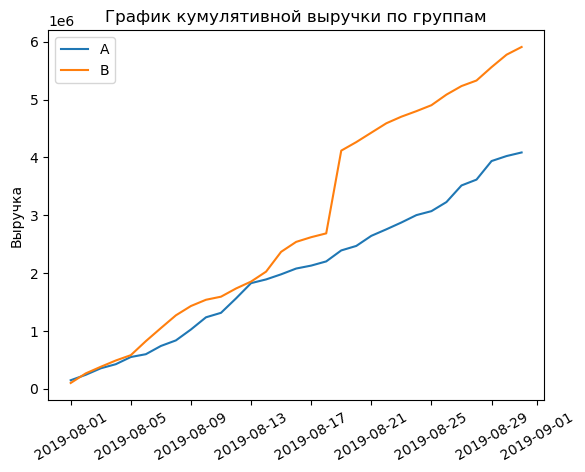

In [23]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend();

Выручка в группе А растёт плавно и она меньше, чем у группы В, у которой есть скачок на 3-й неделе августа, что может говорить либо о появлении дорогих заказов, либо об увеличении количества заказов в группе В.

### Построим график кумулятивного среднего чека по группам.

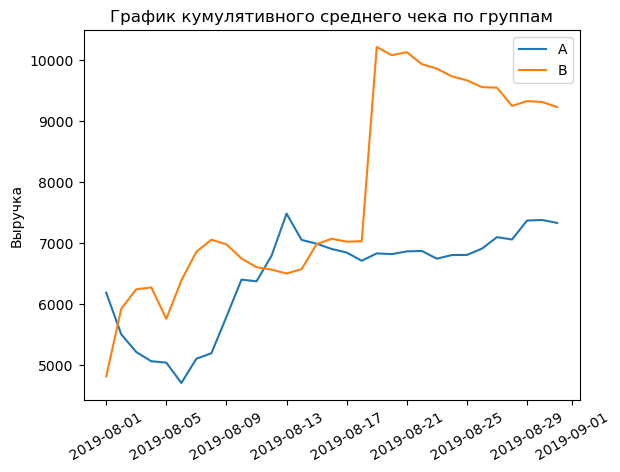

In [24]:
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=30)
plt.legend();

In [25]:
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)
cumulative_revenue_ab.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


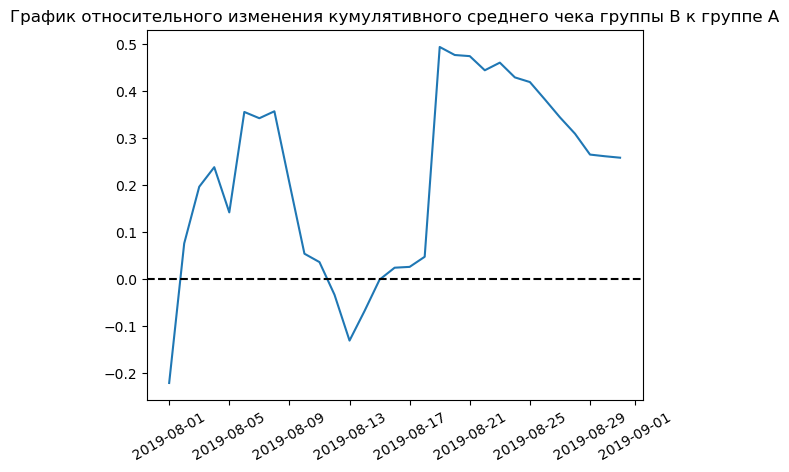

In [26]:
plt.plot(cumulative_revenue_ab['date'], 
         (cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b'])/
         (cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30);

График резко скачет - определённо, имеют место какие-то выбросы и крупные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам. 
Другими словами - конверсия посетителя в покупателя.

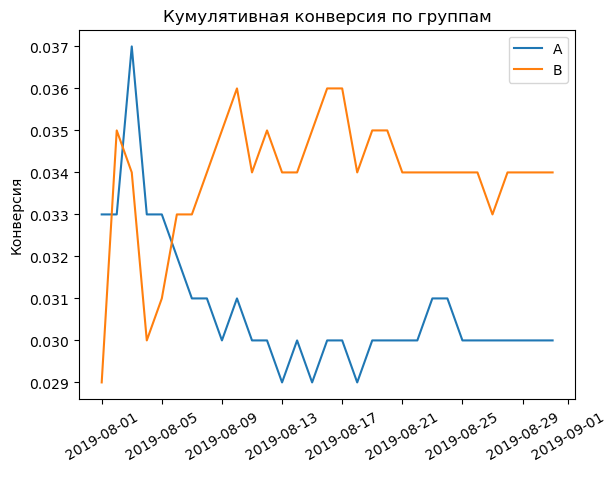

In [27]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel(' ')
plt.ylabel('Конверсия')
plt.xticks(rotation=30);

Как и в теории больших чисел, сначала оба графика сильно колебались, но ближе к концу наблюдения оба выровнялись, при этом конверсия группы В выше.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

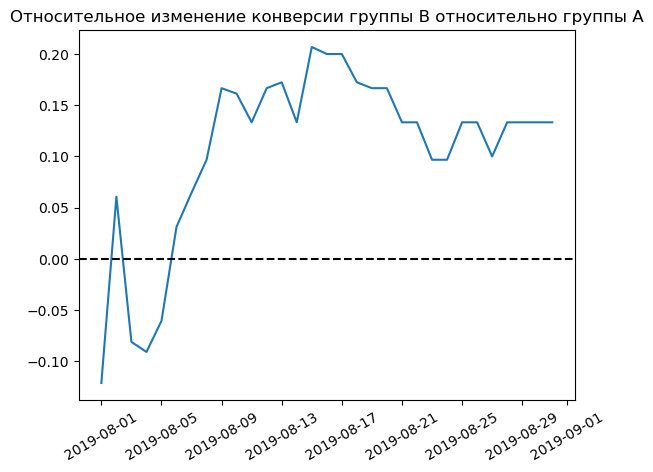

In [28]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)
plt.plot(
    cumulative_conversions_ab['date'], 
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение конверсии группы B относительно группы A')
plt.xticks(rotation=30);

После колебаний в начале теста группа В вырвалась вперед. Ее конверсия росла, далее начался медленный спад. Помним, что графики выше сигнализировали о наличии крупных заказов.

### Построим точечный график количества заказов по пользователям.

In [29]:
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_by_users.columns =  ['visitor_id', 'orders']
orders_by_users['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

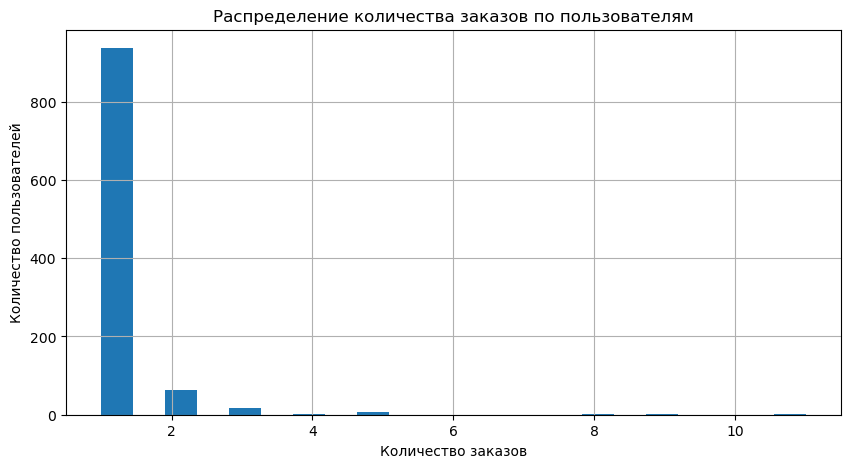

In [30]:
orders_by_users['orders'].hist(bins=11*2, figsize=(10, 5))
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

Большинство пользователей делают всего 1 заказ, но есть и те, кто успел сделать и 11. Посмотрим на точечном графике:

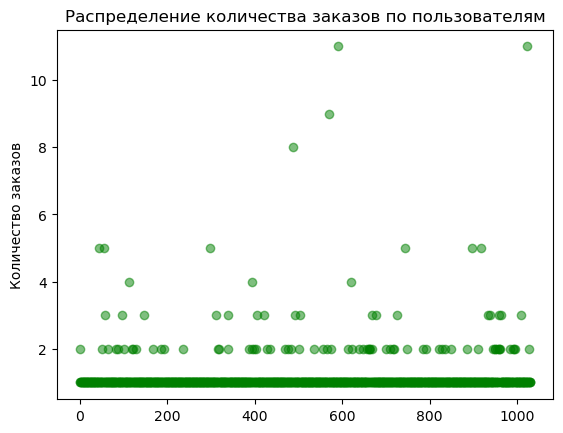

In [31]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.ylabel('Количество заказов');

Много пользователей с 2-3 заказами. Их точная доля не ясна, поэтому сложно понять, что считать выбросами. Поэтому...

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
... и выберем границу для определения аномальных пользователей.

In [32]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершали больше 2 покупок, а 4 и более покупок - всего 1% пользователей. За верхнюю границу аномальных пользователей будем считать 4 заказа на одного пользователя.

### Построим точечный график стоимостей заказов.

count       1197.000
mean        8348.006
std        39191.132
min           50.000
25%         1220.000
50%         2978.000
75%         8290.000
max      1294500.000
Name: revenue, dtype: float64


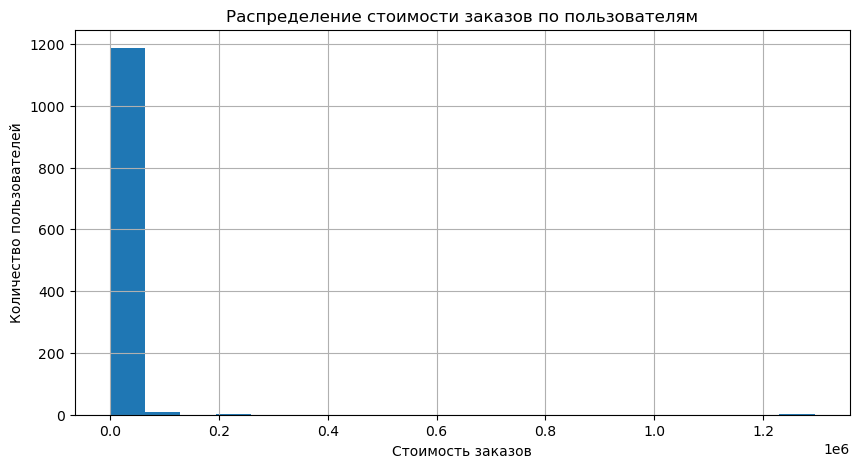

In [33]:
print((orders['revenue'].describe().round(3)))

orders['revenue'].hist(bins=10*2, figsize=(10, 5)) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей');

Медианное значение около 3000, среднее 8350, при этом минимально 50, а максимальное почти 1.3 млн.! В нашем интернет-магазине есть товары на любой вкус и кошелёк). Кажется мы видим явный выброс. Что покажет точечный график:

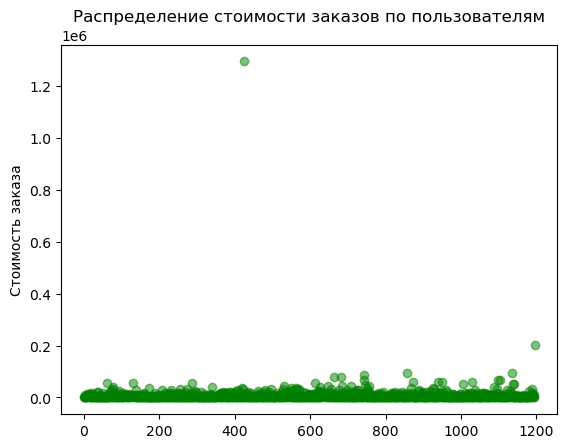

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.ylabel('Стоимость заказа');

Даже линии сетки не нужны, чтобы определить выбросы. Но мы себя обезопасим и...

### Посчитаем 95-й и 99-й перцентили стоимости заказов.
... чтобы выбрать границу для определения аномальных заказов.

In [35]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


До 5% пользователей делают заказы свыше 28000, и меньше 1% - на 58233 и больше. Границей также будем считать наши 99%.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
По результатам A/B-теста мы выяснили, что в данных есть выбросы. Потом нашли границу для их определения. Посчитаем статистическую значимость различий между группами по «сырым» данным — без удаления аномальных пользователей.
Введем основную и альтернативные гипотезы:
- Н0 - различий в среднем количестве заказов на посетителя между группами нет
- Н1 - различия в среднем количестве заказов на посетителя между группами есть

Начнём с подготовки данных.

Так как данные о продажах и средних чеках редко бывают нормально распределены (это классический пример переменных, подверженных выбросам), для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
Установим стандартный уровень статистической значимости, равный 0.05.

In [36]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(10)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


Получилсь следующая таблица:

- date — дата;
- orders_daily_a — количество заказов в выбранную дату в группе A;
- revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
- orders_daily_a — количество заказов в выбранную дату в группе B;
- revenue_per_date_a — суммарная выручка в выбранную дату в группе B;
- orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
- revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
- orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
- revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
- visitors_per_date_a — количество пользователей в выбранную дату в группе A;
- visitors_per_date_b — количество пользователей в выбранную дату в группе B;
- visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
- visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные **orders_by_users_a** и **orders_by_users_b** - в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [37]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные **sample_a** и **sample_b**, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [38]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

Задаем функцию, в которой:

- задаем уровень значимости alpha=0.05,
- применим критерий Манна-Уитни,
- отформатируем p-value, округлив его до трёх знаков после запятой,
- выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1, округлив до трёх знаков после запятой.

In [39]:
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))
    
stat_significance(sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


По "сырым" данным различия в конверсии между группами есть.
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.81%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Введем основную и альтернативные гипотезы:

- Н0 - различий в среднем чеке между группами нет
- Н1 - различия в среднем чеке между группами есть

Уровень значимости также примем 0,05 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

In [40]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём около 1% пользователей с наибольшим числом заказов и около 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — **users_with_many_orders** и пользователей, совершивших заказы дороже 58233 — **users_with_expensive_orders**. Объединим их в таблице **abnormal_users**.
Узнаем, сколько всего аномальных пользователей методом shape().

In [41]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users.shape[0]

15

Всего 15 аномальных пользователей. Посмотрим, как они повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [42]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


На очищенных данных разница между группами есть, а относительный прирост конверсии группы В отнистельно группы А увеличился на 15.3%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [43]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.

### Примем решение по результатам теста.

Остановить тест, зафиксировать победу группы В - при схожих средних чеках в "очищенных" от аномалий данных посетители в группе В лучше конвертируются в заказчиков (на 13-15%). Проверка в цифрах: количество пользователей, покупок, средняя покупка в группах А и В, соответственно:

In [44]:
print(sample_a_filtered.count())
print(sample_b_filtered.count())
print(orders_by_users_a['orders'].sum())
print(orders_by_users_b['orders'].sum())
print((orders.loc[((orders['revenue'] < expensive_orders) & (orders['group'] == 'A'))]['revenue'].mean()).round(2))
print((orders.loc[((orders['revenue'] < expensive_orders) & (orders['group'] == 'B'))]['revenue'].mean()).round(2))

18725
18906
557
640
6470.59
6592.69


# Вывод
На основании входных данных, предоставленных интернет-магазином, был проведено исследование и вынесены рекомендации:

1. В части приоритизации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:

- "Запустить акцию, дающую скидку на товар в день рождения",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";

Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то необходимо рассмотреть следующие:

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
- "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

2. В части анализа А/В теста:

Есть статистически значимое различие в среднем количестве заказов на посетителя между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в А, на 13-15%;

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.

График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А;

На основании вышеизложенного рекомендуем остановить тест, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).